# Introduction

This jupyter notebook makes the cartoon figures in the schematic figure of the SFRD(Z,z) models in Figure 2 of the BH-NS paper.   The Cosmic integration main scripts are adapted from Neijssel et al 2019. https://ui.adsabs.harvard.edu/abs/2019MNRAS.490.3740N/abstract.  Please cite both Broekgaarden & Neijssel et al. 2019 if you are using this code closely. 


## introduction to SFRD prescriptions:


In [1]:
# standard libraries for plotting and python
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns # for colors 

# add here the pathname to the BHNS github repo, 
# this directory should have the name 'BlackHole-NeutronStar' if you git cloned it
pathBHNS = '/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar'
# adds the path to the python functions that we will use 
sys.path.append(pathBHNS+'/Scripts')  
from PostProcessingScripts import * # scripts with post-processing functions
import ClassMSSFR   # for cosmic integration (SFRD) scripts 


# 1. Star formation rate density, SFRD, cartoon image 
Running the MSSFR class will throw some warnings since we are only using it to plot a SFRD, and hence not giving the function input such as metallicities that it usually needs to do the cosmic integration. You can ignore these warnings. 

warning MSSFR instance without metallicityGrid
warning no normalisation of mass evolved assuming 1
cant do it because we have no Metallicity grid


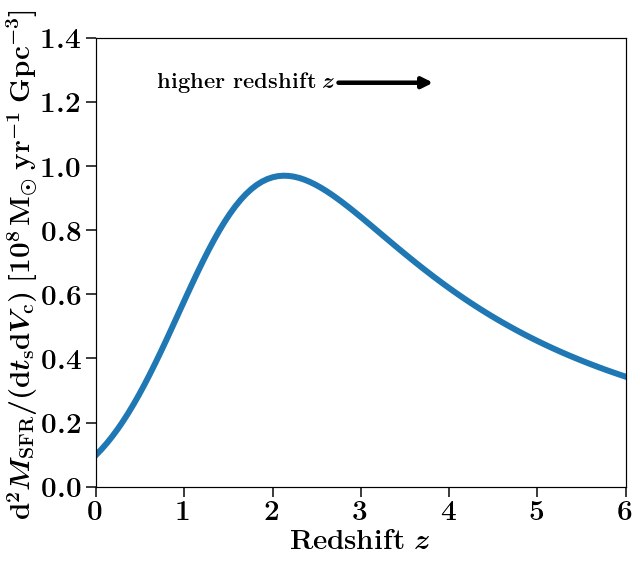

In [2]:


# set fig size 
fig, axes = plt.subplots(1,1, figsize=(9,8))

##### plot the SFRD ######
mssfr = ClassMSSFR.MSSFR() # sets the MSSFR from the class
clist=['#1f77b4']# color for the SFRD
redshifts = np.linspace(0,6,100) # sets redshift range 

# divide SFRD by 1e8 
axes.plot(redshifts, mssfr.SFR_Neijssel(redshifts)/10**8,\
          c=clist[0], lw=6.) # plots SFRD vs redshift 


###### axes layout ######
# axes labels 
nameX = r'\textbf{Redshift} $z$'
nameY = r'$ {\rm{d}}^2M_{\rm{SFR}}/({\rm{d}}t_{{\rm{s}}}{\rm{d}}V_{\rm{c}})\   [10^{8}\, {\rm{M}}_{\odot}\  {\rm{yr}}^{-1}\ {\rm{Gpc}}^{-3}]$'

# make the offset of y values dissapear:
# axes.yaxis.offsetText.set_fontsize(0)
axes.set_ylim(0, 1.4) # set ylim
axes.set_xlim(0,6)  # set xlim

# set labels
layoutAxes(axes, nameX=nameX, nameY=nameY, fontsize=fs+4, setMinor=False)

# remove y labels and ticks 
# axes.tick_params(
#     axis='y',         # changes apply to the y-axis
#     which='both',     # both major and minor ticks are affected
#     left=False,       # ticks along the left edge are off
#     labelleft=False)  # labels along the left edge are off


###### add an arrow for redshift direction #######
strr = r"\textbf{higher redshift} $z$"
x_xy, y_xy = 0.64, 0.9 
x_xytext, y_xytext = 0.45, 0.9
conn = "arc3,rad=+0.0"

axes.annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=22, va="center", ha="right",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=4.5), zorder=20000)


# show and save in BH-NS dir
plt.tight_layout()
plt.savefig('./SFRplot_cartoon.png', dpi=600) 
# plt.savefig('./SFRplot_cartoon.pdf')
plt.show()



# 2. Metallicity distribution, dP / dZ, cartoon image

warning MSSFR instance without metallicityGrid
warning no normalisation of mass evolved assuming 1
cant do it because we have no Metallicity grid


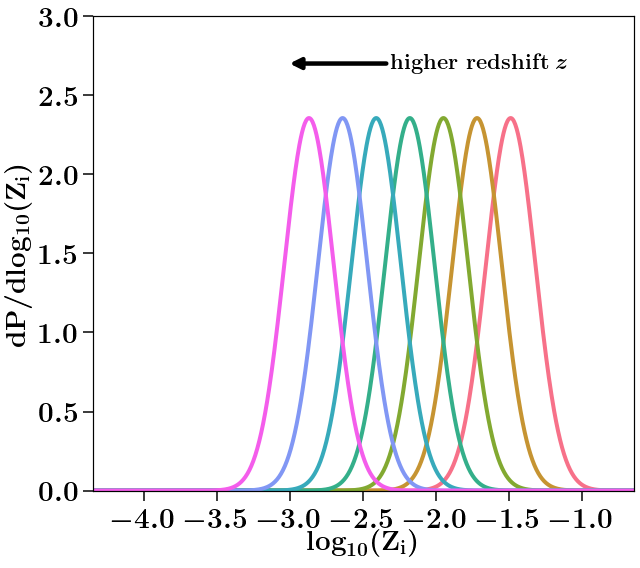

In [3]:


# use SFRD settings from fiducial SFRD(Zi,z) model for cartoon
method     = ['logNormal'    ]
SFRs       = ['Neijssel et al. (2019)']
logNormal  = ['Neijssel Phenomenological']
GSMFs      = [None                       ]
MZs        = [None                       ]
linestyles = ['-'                        ]  
labels     = ['Neijssel+19 (fiducial MSSFR model)']


mssfr = ClassMSSFR.MSSFR() # sets the MSSFR from the class
redshifts = [0, 1, 2, 3, 4, 5, 6]  # which redshifts to plot 
zcolors       = sns.color_palette("husl", len(redshifts))  # colors for redshifts

fig, axes = plt.subplots(1,1, figsize=(9,8))
# set metallicity range
zBins = np.logspace(-4.5,0.,1000)
center = (zBins[1:] + zBins[:-1])/2.
width  = np.diff(np.log10(zBins))

handles1 = []
for nrz, redshift in enumerate(redshifts):
    nrL = 0 # take first element from SFRD list settings
    PDF = np.zeros(len(center))
    mssfr.Zprescription         = method[nrL]
    mssfr.SFRprescription       = SFRs[nrL]
    mssfr.logNormalPrescription = logNormal[nrL]
    mssfr.GSMFprescription      = GSMFs[nrL]
    mssfr.ZMprescription        = MZs[nrL]
    #code is done such that we have to do it per metallicity
    for nrZ, Z in enumerate(center):
        Zlower   = zBins[nrZ]
        Zupper   = zBins[nrZ+1]
        if method[nrL] == 'logNormal':
            PDF[nrZ] = mssfr.returnFractionLogNormal(Zlower, Zupper, redshift)
        if method[nrL] == 'MZ_GSMF':
            PDF[nrZ] = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, [redshift])
    PDF = np.divide(PDF, width)
    label = None 
    ll    = True


    l = axes.plot(np.log10(center), PDF,  color=zcolors[nrz], \
          label=label, lw=4, alpha=1, linestyle=linestyles[nrL])
    handles1.extend(l)



# axes label names         
nameX = r'$\rm \log_{10}(Z_{\rm{i}})$'
nameY = r'$\rm dP / dlog_{10}(Z_{\rm{i}}) $'
# make up axes layout   
axes = layoutAxes(axes, nameX=nameX, nameY=nameY, fontsize=fs+4, setMinor=False)
axes.set_ylim(bottom=0, top=3)
axes.set_xlim(np.log10((10**(-2.5))*mssfr.solarMetallicity), np.log10((10**(1.2))*mssfr.solarMetallicity))




# properties redshift arrow 
strr = r"\textbf{higher redshift} $z$"
x_xy, y_xy = 0.36, 0.9
x_xytext, y_xytext = 0.55, 0.9
conn = "arc3,rad=+0.0"

# draw arrow redshift
axes.annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=22, va="center", ha="left",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=4.5), zorder=20000)


# show and save 
plt.tight_layout()
plt.savefig('./ZvsPDF_cartoon.png')
plt.show()
plt.close()

# 3. SFRD(Zi, z), cartoon image

warning MSSFR instance without metallicityGrid
warning no normalisation of mass evolved assuming 1
cant do it because we have no Metallicity grid


NameError: name 'solar' is not defined

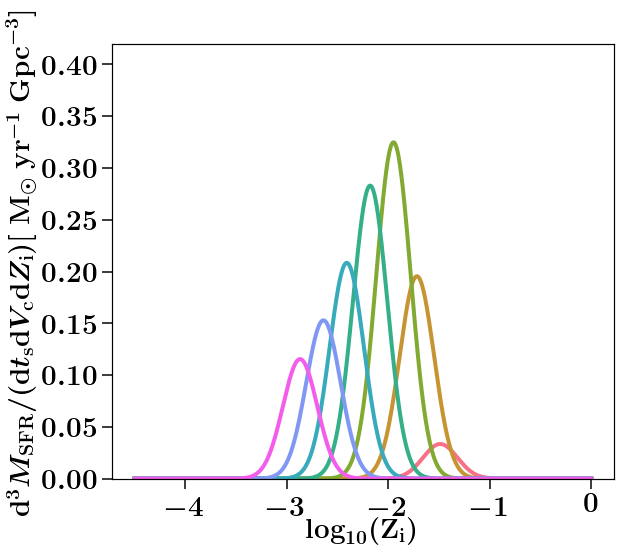

In [4]:

# use SFRD settings from fiducial SFRD(Zi,z) model for cartoon
method     = ['logNormal'    ]
SFRs       = ['Neijssel et al. (2019)']
logNormal  = ['Neijssel Phenomenological']
GSMFs      = [None                       ]
MZs        = [None                       ]
linestyles = ['-'                        ]  
labels     = ['Neijssel+19 (fiducial MSSFR model)']

mssfr = ClassMSSFR.MSSFR() # sets the MSSFR from the class

fig, axes = plt.subplots(1,1, figsize=(9,8))
# set metallicity grid 
zBins = np.logspace(-4.5,0.,1000)
center = (zBins[1:] + zBins[:-1])/2.
width  = np.diff(np.log10(zBins))


# redshifts 
redshifts = np.asarray([0, 1, 2, 3, 4, 5, 6])
SFR_z = mssfr.SFR_Neijssel(redshifts) /(1E8 * len(redshifts)) #  Msun yr^-1 Gpc^-3
zcolors       = sns.color_palette("husl", len(redshifts))



handles1 = []
for nrz, redshift in enumerate(redshifts):
    nrL=0
    PDF = np.zeros(len(center))
    mssfr.Zprescription         = method[nrL]
    mssfr.SFRprescription       = SFRs[nrL]
    mssfr.logNormalPrescription = logNormal[nrL]
    mssfr.GSMFprescription      = GSMFs[nrL]
    mssfr.ZMprescription        = MZs[nrL]

    #code is done such that we have to do it per metallicity
    for nrZ, Z in enumerate(center):
        Zlower   = zBins[nrZ]
        Zupper   = zBins[nrZ+1]
        if method[nrL] == 'logNormal':
            PDF[nrZ] = mssfr.returnFractionLogNormal(Zlower, Zupper, redshift)
        if method[nrL] == 'MZ_GSMF':
            PDF[nrZ] = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, [redshift])
    PDF = np.divide(PDF, width)

    label = r'$z=%s$'%redshift
    l = axes.plot(np.log10(center), PDF*SFR_z[nrz],  color=zcolors[nrz], \
          label=label, lw=4, alpha=1, linestyle=linestyles[nrL])
    handles1.extend(l)
   
        
        
# set axes properties
Ylim=0.42            
nameX = r'$\rm \log_{10}(Z_{\rm{i}})$'
nameY = r'$ {\rm{d}}^3M_{\rm{SFR}}/({\rm{d}}t_{{\rm{s}}}{\rm{d}}V_{\rm{c}}{\rm{d}}Z_{\rm{i}})  [\ {\rm{M}}_{\odot}\  {\rm{yr}}^{-1}\ {\rm{Gpc}}^{-3}]$'
# set layout axes
layoutAxes(axes, nameX=nameX, nameY=nameY, fontsize=fs+4, setMinor=False)
axes.set_ylim(bottom=0, top=Ylim)
axes.set_xlim(np.log10((10**(-2.5))*solar), np.log10((10**1.2)*solar))

# set arrow properties
strr = r"\textbf{higher redshift} $z$"
x_xy, y_xy = 0.36, 0.9
x_xytext, y_xytext = 0.55, 0.9
conn = "arc3,rad=+0.0"

# draw redshift arrow
axes.annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=22, va="center", ha="left",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=4.5), zorder=20000)


# plot and show
plt.tight_layout()
plt.savefig('./metallicity-specific-SFRD_cartoon.png', dpi=600)
# plt.savefig('./metallicity-specific-SFRD_CARTOON.pdf')
plt.show()
plt.close()

# 4. GSMF, cartoon image

In [ ]:
def doubleSchechterPerLog10FurlongLineair(logM, z):
    logMc, phi1, a1, phi2, a2, ratio = lineairFitDoubleSchechter(z)
    schechter = ((phi1*(10**((a1+1)*(logM-logMc)))) + (phi2*(10**((a2+1)*(logM-logMc)))))\
               *(np.exp(-pow(10,logM-logMc)))
    return schechter


def lineairFitDoubleSchechter(z):

    try:
        nr = len(z)
    except:
        z  = np.array([z])
        nr = 1

    
    fitredshifts = np.array([0.1, 0.5, 1.0, 2.0, 3.0, 4.0])
    fitlogMc     = np.array([10.95, 10.88, 10.74, 10.44, 10.19, 10.00])
    fitphi1      = np.array([1.45, 1.61, 1.51, 1.06, 0.63, 0.24])*10**-3
    fita1        = np.array([-1.31, -1.24, -0.98, -0.25, 0.23, 0.43])
    fitphi2      = np.array([0.0,  0.08,   0.48, 0.8, 0.61, 0.43])*10**-3
    fita2        = np.array([-2.22, -1.79, -1.62, -1.58, -1.64, -1.69])
    
    ratioPhi1Phi2 = np.divide(fitphi2, fitphi1) #Do it in this order because phi2 is zero
    
    fitvalues  = [fitlogMc, fitphi1, fita1, fitphi2, fita2, ratioPhi1Phi2]
    thresholds = [0.0, 0.5, 1.0, 2.0, 3.0, 10000000]
    r          = []
    for nrv, values in enumerate(fitvalues):
        dz     = np.diff(fitredshifts)
        dydz   = np.divide(np.diff(values), dz)
        yvalues= np.zeros(nr)
        for nrz, redshift in enumerate(thresholds[:-1]):
            mask = (z>= thresholds[nrz]) & (z<=thresholds[nrz+1])
            if nrz == 0 :
                #interpolate from z0.5 down
                dz   = 0.5 - z[mask]
                interpolatedValue  = values[nrz+1] - np.multiply(dz, dydz[nrz])
            else:
                #interpolate up
                dz   = z[mask] - redshift
                interpolatedValue  = values[nrz] + np.multiply(dz, dydz[nrz])
            yvalues[mask] =  interpolatedValue
        r.append(yvalues)
        
    r[3][r[3]<0]  = 0  #phi2
    r[1][r[1] <0] = 0  #phi1
    r[4][r[4]<-2] = -2 #a2
    return r[0], r[1], r[2], r[3], r[4], r[5]

In [ ]:

mssfr = ClassMSSFR.MSSFR() # sets the MSSFR from the class
logM      = np.linspace(6,13,100)
redshifts = [0, 1, 2, 3, 4, 5, 6]
# redshidt colors 
zcolors       = sns.color_palette("husl", len(redshifts))
linestyles= ['-'] 



fig, axes = plt.subplots(1,1, figsize=(9,8))

for nrz, z in enumerate(redshifts):
    # plot cartoon for double Furlong GSMF
    label1, label2, label3 = None, None, None
    FurlongDouble = doubleSchechterPerLog10FurlongLineair(logM, z)
    axes.plot(logM, np.log10(FurlongDouble), c=zcolors[nrz], label=label3, lw=4, linestyle=linestyles[0], alpha=1)


# axes properties
nameX = r'$\rm log_{10}(M_{*}/M_{\odot})$'
nameY = r'$\rm log_{10}( dN / dlog_{10}(M_*/M_{\odot}))$'
# set layout axes
layoutAxes(axes, nameX=nameX, nameY=nameY, fontsize=fs+4, setMinor=False)
axes.set_ylim(bottom=-5, top=0)
axes.set_xlim(left=6, right=13)


# set redshift arrow properties
strr = r"\textbf{higher redshift} $z$"
x_xy, y_xy =  0.5, 0.62
x_xytext, y_xytext = 0.55, 0.85
conn = "arc3,rad=+0.0"

# draw redshift arrow
axes.annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=22, va="center", ha="left",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=4.5), zorder=20000)


# save and show 
plt.tight_layout()
plt.savefig('./GSMF_cartoon.png')
plt.show()
plt.close()


# 5. MZR, cartoon image

In [ ]:

mssfr = ClassMSSFR.MSSFR() # sets the MSSFR from the class
mssfr.logOH12sun            = 8.69    #fraction number density solar
mssfr.solarMetallicity      = 0.0142  #fraction mass in metals solar, based on Asplund

dictMZ      = {'3: Ma et al. (2015)':2,  '1: Langer et al. (2006)':0   ,\
               '2: Langer et al. + offset (2006)':1}

linestyles= ['-'] 

MZfunctions = [MSSFR.Langer2005MZ] #,  None, MSSFR.Ma2015MZ]
ZMfunctions = [MSSFR.Langer2005ZM]#,  MSSFR.Langer2005OffsetZM, MSSFR.Ma2015ZM]


logZZsun  = np.linspace(-3, 3, 100)
redshifts = [0, 1, 2, 3, 4, 5, 6]
zcolors       = sns.color_palette("husl", len(redshifts))

# plot langer+2006 MZR for Cartoon 
plot      = ['1: Langer et al. (2006)']
fig, axes = plt.subplots(1,1, figsize=(9,8))

    
    
for prescription in plot:
    i         = dictMZ[prescription]
    plt.plot([-100, -40], [-100, -100],linestyle=linestyles[i], \
             lw=3.5, alpha=1, label=prescription, c='k')


for prescription in plot:
    i         = dictMZ[prescription]
    
    
    for zind, zz in enumerate(redshifts):
        if i==1:
            label = r'$z=%s$'%zz
        else:
            label=None
            
        
        logM      = ZMfunctions[i](10**logZZsun, zz)
        #I want to plot logOH12 not ZZsun
        logOH12   =  MSSFR.LogOH12vsLogZZsun(logZZsun, inValue='logZZsun')
        #to prevent overlapping dashed lines
        axes.plot(logM, logOH12, c=zcolors[zind],\
                  linestyle=linestyles[i], lw=3.5, alpha=1, label=label)  
    
    
# set axes properties 
axes.set_ylim(6.5, 10)
axes.set_xlim(6.7,13)
nameX = r'$\rm log_{10}(M_{*}/M_{\odot})$'
nameY = r'$\rm log_{10}[O/H]+12$'
# set layout axes
layoutAxes(axes, nameX=nameX, nameY=nameY, fontsize=fs+4, setMinor=False)



# redshift arrow properties
strr = r"\textbf{higher redshift} $z$"
x_xy, y_xy = 0.42, 0.65
x_xytext, y_xytext = 0.05, 0.9
conn = "arc3,rad=+0.0"

# plot redshift arrow 
axes.annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=22, va="center", ha="left",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=4.5), zorder=20000)


# save and show figure 
plt.tight_layout()
plt.savefig('./MZrelation_cartoon.png')
plt.show()
plt.close()



# 6. redshift legend

In [ ]:

fig, axes = plt.subplots(1,1, figsize=(8,8))

redshifts = np.asarray([0, 1, 2, 3, 4, 5, 6])

zcolors       = sns.color_palette("husl", len(redshifts))

for nrz, redshift in enumerate(redshifts):
    label = r'$z=%s$'%redshift
    plt.plot([-100, -40], [-100, -100],linestyle='-', \
             lw=4, alpha=1, label=label, c=zcolors[nrz])    
    
    
    axes.legend(loc=1,  prop={'size':20}, ncol=1)   
        

        
axes.set_ylim(bottom=1, top=2)
axes.set_xlim(0,1)
plt.tight_layout()
plt.savefig('./z_legend.png', dpi=600)
# plt.savefig('./z_legend.pdf')
plt.show()
plt.close()